### We are going to analyse the HR  dataset and predict whether an employee will stay or leave the organisation based on certain factors

## About the dataset

###### This HR dataset has eight features using which we will predict the target variable called "left".
Using the number of project, average monthly hours, time_spend_company, promotion in last 5 years the employees are evaluated. Based on the performance of an employee and the respected credits given to them we will predict whether an employee will retain or leave the organisation and we will find the major cause behind their termination.

###### Let's import the necessary libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [46]:
data= pd.read_csv(r"F:\Vasanthi\Downloads\Project dataset\HR_comma_sep.csv")

In [47]:
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,0.38,0.53,2,157,3,0,0,low
1,1,0.80,0.86,5,262,6,0,0,medium
2,1,0.11,0.88,7,272,4,0,0,medium
3,1,0.72,0.87,5,223,5,0,0,low
4,1,0.37,0.52,2,159,3,0,0,low


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   left                   14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [49]:
data.isnull().sum()

left                     0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
dtype: int64

In [50]:
data.describe()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


#### Perform Exploratory Data Analysis (EDA) tasks

#### Firstly we will find out how many employees have left the organisation?

In [51]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

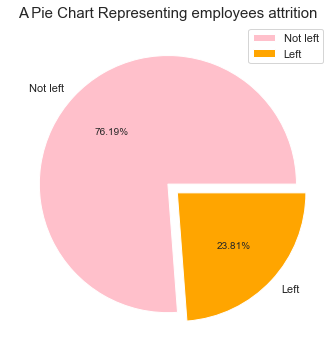

In [52]:
size = [11428, 3571]
labels = "Not left", "Left"
colors = ['pink', 'orange']
explode = [0, 0.1]

plt.subplots(figsize=(5,5))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = False, autopct = "%.2f%%")
plt.title('A Pie Chart Representing employees attrition', fontsize = 15)
plt.axis('on')
plt.legend()
plt.show()

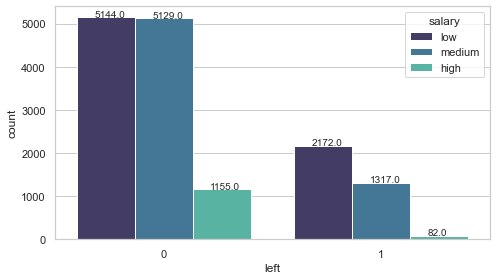

In [53]:
plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x=data.left, hue =data.salary, data=data, palette='mako');
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+10))

plt.show()

#### Let's find how the salary is distributed?

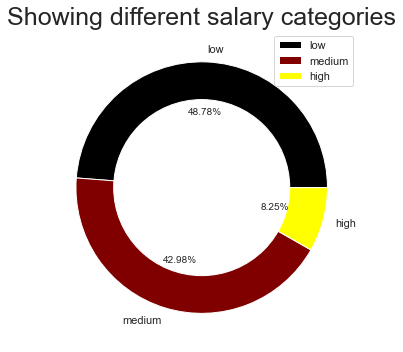

In [54]:
size = [7316, 6446, 1237]
colors = ['black', "maroon",'yellow']
labels = "low", "medium", "high"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Showing different salary categories', fontsize = 25)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

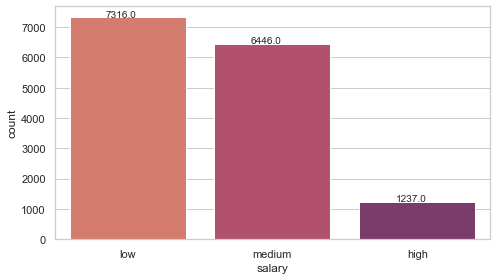

In [55]:
plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x=data.salary, data=data, palette='flare');
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+10))

plt.show()

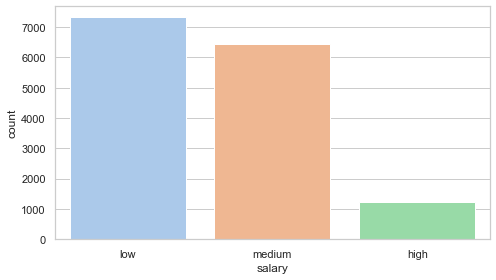

In [56]:
sns.countplot(x=data.salary, data=data, palette='pastel');


Among 14,999 workers 3571 have left the organisation. The people with high salary are comparatively less in the organisation while people with low salary are vice versa. From the above two visualisations we can see that, employees who left the organisation are more from the people who received low salary.

#### How satisfaction level is influencing the target variable?

Text(0.5, 1.0, 'Distribution of satisfaction of Employees')

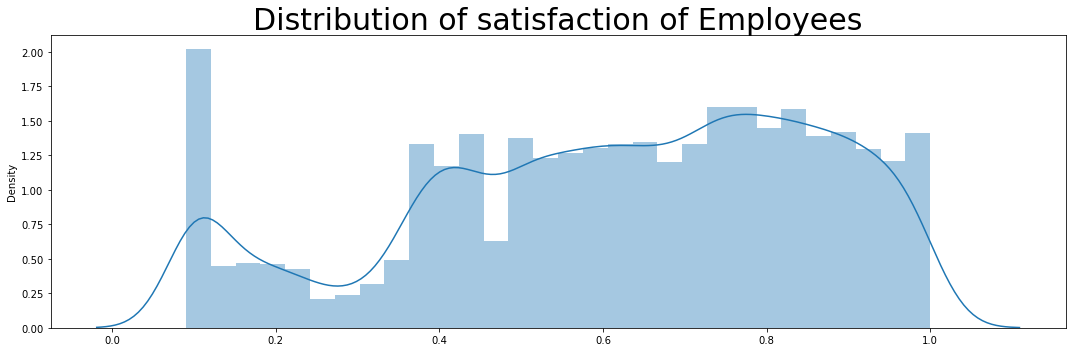

In [13]:
plt.subplots(figsize=(15,5))
sns.distplot(x=data['satisfaction_level'])
plt.title('Distribution of satisfaction of Employees', fontsize = 30)

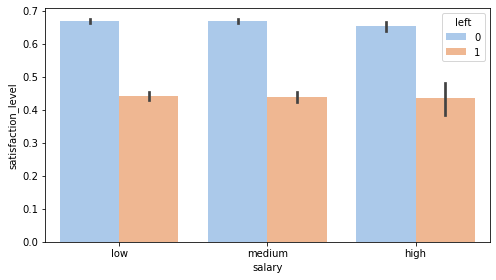

In [14]:
sns.barplot(y=data.satisfaction_level, x= data.salary, data=data, hue= data.left, palette='pastel');

* People whose satisfaction level is low or below 50% has left the organization.And on contradiction salary is not the only cause for leaving the organisation. Beacuse employee who is paid high salary has also left the organisation.

#### How salary and time spent on working together affects the target variable?

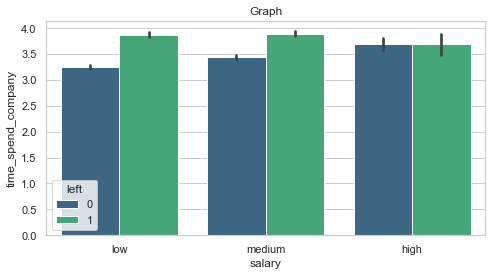

In [15]:
sns.set(style="whitegrid")
ax = sns.barplot(y=data.time_spend_company, x=data.salary, hue=data.left, data=data, palette='viridis')
plt.title('Graph')
plt.show()


* Employees who spent more time in the company, but not paid enough have left the company, because they feel less satisfied by the amount they get paid for the work they do.

#### Checking Multicollinearity

In [16]:
data.corr()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction_level,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


<AxesSubplot:>

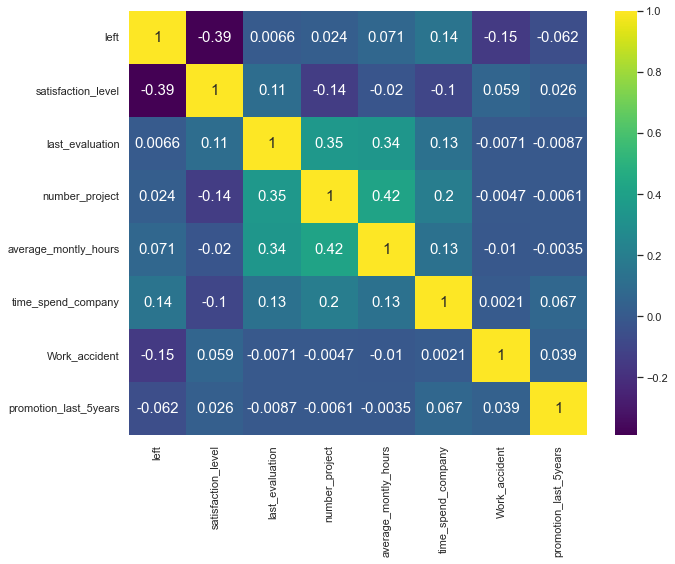

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="viridis", annot_kws={"size":15})

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [20]:
data["salary"]=le.fit_transform(data["salary"])

In [21]:
data.head()

,left,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,1,0.38,0.53,2,157,3,0,0,1
1,1,0.80,0.86,5,262,6,0,0,2
2,1,0.11,0.88,7,272,4,0,0,2
3,1,0.72,0.87,5,223,5,0,0,1
4,1,0.37,0.52,2,159,3,0,0,1


### Logistic Regression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=data.drop('left', axis=1)

In [24]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,2
2,0.11,0.88,7,272,4,0,0,2
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


In [63]:
y=data[['left']]

In [64]:
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y,random_state=100)

In [66]:
Prevalance_rate_ytrain=y_train.value_counts(normalize=True).mul(100).round(1)
Prevalance_rate_ytrain

left
0       76.2
1       23.8
dtype: float64

In [67]:
Prevalance_rate_ytest=y_test.value_counts(normalize=True).mul(100).round(1)
Prevalance_rate_ytest

left
0       76.2
1       23.8
dtype: float64

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
minmax=MinMaxScaler()
x_train=minmax.fit_transform(x_train)

In [70]:
x_test=minmax.transform(x_test)

In [71]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10499, 8)
(4500, 8)
(10499, 1)
(4500, 1)


In [72]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

# fit the model with data
lg.fit(x_train,y_train)

#
y_pred=lg.predict(x_test)

In [73]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3205,  224],
       [ 795,  276]], dtype=int64)

Text(0.5, 281.2, 'Predicted label')

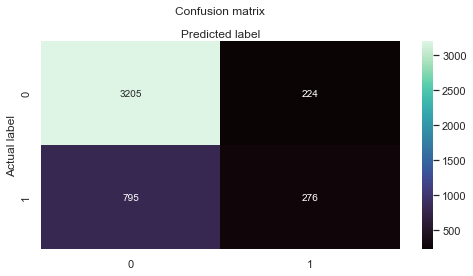

In [74]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7735555555555556
Precision: 0.552
Recall: 0.25770308123249297


In [76]:
from sklearn.metrics import classification_report
print("Classsfication report of test data:\n",classification_report(y_test,y_pred))

Classsfication report of test data:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      3429
           1       0.55      0.26      0.35      1071

    accuracy                           0.77      4500
   macro avg       0.68      0.60      0.61      4500
weighted avg       0.74      0.77      0.74      4500



##### Well, we got a classification rate of 77%, considered as good accuracy.

##### Precision: Precision is about being precise, i.e., how accurate our model is. In other words, you can say, when a model makes a prediction, how often it is correct. Our model is 55% times gives correct predictions.

##### Recall: If employees are going to leave, our  Logistic Regression model can identify it 26% of the time.

In [87]:
y_train.value_counts()

left
0       7999
1       2500
dtype: int64

In [89]:

print("Before OverSampling, counts of label '1': ",y_train.value_counts()[1])
print("Before OverSampling, counts of label '0': ",y_train.value_counts()[0])
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
  
print('After OverSampling, the shape of train_X: ',x_train_res.shape)
print('After OverSampling, the shape of train_y: ',y_train_res.shape)
  
print("After OverSampling, counts of label '1': ",y_train_res.value_counts()[1])
print("After OverSampling, counts of label '0': ",y_train_res.value_counts()[0])

Before OverSampling, counts of label '1':  2500
Before OverSampling, counts of label '0':  7999
After OverSampling, the shape of train_X:  (15998, 8)
After OverSampling, the shape of train_y:  (15998, 1)
After OverSampling, counts of label '1':  7999
After OverSampling, counts of label '0':  7999


In [90]:
lg = LogisticRegression()

# fit the model with data
lg.fit(x_train_res,y_train_res)

#
y_pred=lg.predict(x_test)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      3429
           1       0.49      0.78      0.60      1071

    accuracy                           0.75      4500
   macro avg       0.70      0.76      0.71      4500
weighted avg       0.81      0.75      0.77      4500



#### The SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class. And so our Recall,precision and f1-score also increased.

### ........................................................................................................................................................................................